In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# import drive from google colab for importing dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# Creating a folder path
merged_files = '/content/drive/MyDrive/Google Data Analytics Professional Certificate/Cyclist_data_csv'


In [6]:
# Get all .xlsx file paths
file = [f for f in os.listdir(merged_files) if f.endswith('.csv')]
file


['202405-divvy-tripdata.csv',
 '202406-divvy-tripdata.csv',
 '202407-divvy-tripdata.csv',
 '202408-divvy-tripdata.csv',
 '202409-divvy-tripdata.csv',
 '202410-divvy-tripdata.csv',
 '202411-divvy-tripdata.csv',
 '202412-divvy-tripdata.csv',
 '202501-divvy-tripdata.csv',
 '202502-divvy-tripdata.csv',
 '202503-divvy-tripdata.csv',
 '202504-divvy-tripdata.csv']

In [7]:
# Creating an empty DataFrame to store merged data
cyclist_merged_df = pd.DataFrame()


In [8]:
# Loop through each file and append empty DataFrame
for i in file:
  file_path = os.path.join(merged_files, i)
  df = pd.read_csv(file_path,low_memory=False)
  cyclist_merged_df = pd.concat([cyclist_merged_df, df],ignore_index=True)


In [9]:
# Analysing first 5 rows from the whole dataset
cyclist_merged_df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,Unnamed: 15,Unnamed: 16
0,7D9F0CE9EC2A1297,classic_bike,25-05-2024 15:52,25-05-2024 16:11,Streeter Dr & Grand Ave,13022,Clark St & Elm St,TA1307000039,41.892278,-87.612043,41.902973,-87.631280,casual,0:19:00,7,NaN,NaN
1,02EC47687411416F,classic_bike,14-05-2024 15:11,14-05-2024 15:22,Sheridan Rd & Greenleaf Ave,KA1504000159,Sheridan Rd & Loyola Ave,RP-009,42.010587,-87.662412,42.001044,-87.661198,casual,0:11:00,3,NaN,NaN
2,101370FB2D3402BE,classic_bike,30-05-2024 17:46,30-05-2024 18:09,Streeter Dr & Grand Ave,13022,Wabash Ave & 9th St,TA1309000010,41.892278,-87.612043,41.870769,-87.625734,member,0:23:00,5,NaN,NaN
3,E97E396331ED6913,electric_bike,17-05-2024 20:21,17-05-2024 20:40,Streeter Dr & Grand Ave,13022,Sheffield Ave & Wellington Ave,TA1307000052,41.892270,-87.611946,41.936253,-87.652662,member,0:19:00,6,NaN,NaN
4,674EDE311C543165,classic_bike,22-05-2024 18:52,22-05-2024 18:59,Larrabee St & Division St,KA1504000079,Clark St & Elm St,TA1307000039,41.903486,-87.643353,41.902973,-87.631280,casual,0:07:00,4,NaN,NaN


In [10]:
# Analysing total number of rows and columns before cleaning
cyclist_merged_df.shape


(5454678, 17)

# Exploratory Data Analysis

In [11]:
# Creating a copy
cyclist_df = cyclist_merged_df.copy()


In [12]:
# Analysing first 5 rows from the whole dataset
cyclist_df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,Unnamed: 15,Unnamed: 16
0,7D9F0CE9EC2A1297,classic_bike,25-05-2024 15:52,25-05-2024 16:11,Streeter Dr & Grand Ave,13022,Clark St & Elm St,TA1307000039,41.892278,-87.612043,41.902973,-87.631280,casual,0:19:00,7,NaN,NaN
1,02EC47687411416F,classic_bike,14-05-2024 15:11,14-05-2024 15:22,Sheridan Rd & Greenleaf Ave,KA1504000159,Sheridan Rd & Loyola Ave,RP-009,42.010587,-87.662412,42.001044,-87.661198,casual,0:11:00,3,NaN,NaN
2,101370FB2D3402BE,classic_bike,30-05-2024 17:46,30-05-2024 18:09,Streeter Dr & Grand Ave,13022,Wabash Ave & 9th St,TA1309000010,41.892278,-87.612043,41.870769,-87.625734,member,0:23:00,5,NaN,NaN
3,E97E396331ED6913,electric_bike,17-05-2024 20:21,17-05-2024 20:40,Streeter Dr & Grand Ave,13022,Sheffield Ave & Wellington Ave,TA1307000052,41.892270,-87.611946,41.936253,-87.652662,member,0:19:00,6,NaN,NaN
4,674EDE311C543165,classic_bike,22-05-2024 18:52,22-05-2024 18:59,Larrabee St & Division St,KA1504000079,Clark St & Elm St,TA1307000039,41.903486,-87.643353,41.902973,-87.631280,casual,0:07:00,4,NaN,NaN


In [13]:
# Summary of the dataset
cyclist_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454678 entries, 0 to 5454677
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  day_of_week         int64  
 15  Unnamed: 15         float64
 16  Unnamed: 16         object 
dtypes: float64(5), int64(1), object(11)
memory usage: 707.5+ MB


In [14]:
# Querying for null values
cyclist_df.isnull().sum()


,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1036689
start_station_id,1036689
end_station_name,1064162
end_station_id,1064162
start_lat,0
start_lng,0


In [15]:
 # Dropping Unnamed column
 cyclist_df=cyclist_df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)


In [16]:
# Dropping null values from "end_lat" and "end_lng" column
cyclist_df = cyclist_df.dropna(subset=['end_lat','end_lng'])


In [17]:
# Re-checking for null values
cyclist_df.isnull().sum()


,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1036689
start_station_id,1036689
end_station_name,1058058
end_station_id,1058058
start_lat,0
start_lng,0


#### Will not drop null values of station names and their respective id as other columns of same rows may contain sensitive data.

In [18]:
# Analysing total number of rows and columns after dropping some columns,duplicates and null values
cyclist_df.shape


(5448574, 15)

In [19]:
# Changing data type of "started_at" column from "object" to "datetime64"
cyclist_df['started_at'] = pd.to_datetime(cyclist_df['started_at'],dayfirst=True)

# Changing data type of "ended_at" column from "object" to "datetime64"
cyclist_df['ended_at'] = pd.to_datetime(cyclist_df['ended_at'],dayfirst=True)


In [20]:
# Rechecking summary of the dataset after changing datatype
cyclist_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5448574 entries, 0 to 5454677
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         object        
 14  day_of_week         int64         
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 665.1+ MB


In [21]:
# Statistical summary
cyclist_df.describe(include='all')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
count,5448574,5448574,5448574,5448574,4411885,4411885,4390516,4390516,5.448574e+06,5.448574e+06,5.448574e+06,5.448574e+06,5448574,5448574,5.448574e+06
unique,5113546,3,NaN,NaN,1851,1772,1852,1769,NaN,NaN,NaN,NaN,2,19227,NaN
top,8.59E+15,electric_bike,NaN,NaN,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member,0:05:00,NaN
freq,3,2908998,NaN,NaN,59790,59790,61186,61186,NaN,NaN,NaN,NaN,3464454,37619,NaN
mean,NaN,NaN,2024-09-19 21:15:43.422054656,2024-09-19 21:27:53.827345920,NaN,NaN,NaN,NaN,4.190227e+01,-8.764632e+01,4.190263e+01,-8.764658e+01,NaN,NaN,4.120235e+00
min,NaN,NaN,2024-05-01 00:00:00,2024-05-01 00:05:00,NaN,NaN,NaN,NaN,4.164000e+01,-8.791000e+01,1.606000e+01,-1.440500e+02,NaN,NaN,1.000000e+00
25%,NaN,NaN,2024-07-02 22:11:00,2024-07-02 22:28:00,NaN,NaN,NaN,NaN,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766000e+01,NaN,NaN,2.000000e+00
50%,NaN,NaN,2024-08-28 11:13:00,2024-08-28 11:29:00,NaN,NaN,NaN,NaN,4.189694e+01,-8.764182e+01,4.189776e+01,-8.764275e+01,NaN,NaN,4.000000e+00
75%,NaN,NaN,2024-11-17 11:33:00,2024-11-17 11:19:45,NaN,NaN,NaN,NaN,4.192962e+01,-8.762954e+01,4.193000e+01,-8.762963e+01,NaN,NaN,6.000000e+00
max,NaN,NaN,2025-04-30 23:59:00,2025-04-30 23:59:00,NaN,NaN,NaN,NaN,4.207000e+01,-8.752000e+01,8.796000e+01,1.720000e+00,NaN,NaN,7.000000e+00


In [22]:
# Installing reverse geocoder for locating places from latitude and longitude
!pip install reverse_geocoder


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268067 sha256=f15efac5a8d1d0f3cb8ab454b4df545fb96fe6244616b9d7d5ff48d6658ffda1
  Stored in directory: /root/.cache/pip/wheels/17/3c/41/2bc89719586c2a5c53e9a527daa76a968a1288315c1ae2d904
Successfully built reverse_geocoder


In [23]:
# Importing reverse geocoder for assigning names to "start_station_name" and "end_station_name" column in place of null values
import reverse_geocoder as rg


In [24]:
# Getting only the null values of start_station_name column
start_station_name_null_values = cyclist_df[cyclist_df['start_station_name'].isnull()]

# Getting only the null values of end_station_name column
end_station_name_null_values = cyclist_df[cyclist_df['end_station_name'].isnull()]


In [25]:
# Indexing the null values
start_station_name_null_index = start_station_name_null_values['start_station_name'].index

# Indexing the null values
end_station_name_null_index = end_station_name_null_values['end_station_name'].index


In [26]:
# Converting start(lat,lon) to tuple(lat,long)
coordinates_start = list(zip(start_station_name_null_values['start_lat'], start_station_name_null_values['start_lng']))

# Converting end(lat,lon) to tuple(lat,long)
coordinates_end = list(zip(end_station_name_null_values['end_lat'],end_station_name_null_values['end_lng']))


In [27]:
# Batch process for place names
results_start = rg.search(coordinates_start)

# Batch process for place names
results_end = rg.search(coordinates_end)


Loading formatted geocoded file...


In [28]:
# Place names extracted from reverse geocoding
place_names_start = [res['name'] for res in results_start]

# Place names extracted from reverse geocoding
place_names_end = [res['name'] for res in results_end]


In [29]:
# Assigning place names to null values and Updating the dataset simultaneously

cyclist_df.loc[start_station_name_null_index, 'start_station_name'] = place_names_start

cyclist_df.loc[end_station_name_null_index, 'end_station_name'] = place_names_end

In [30]:
# Querying for null values
cyclist_df.isnull().sum()


,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,1036689
end_station_name,0
end_station_id,1058058
start_lat,0
start_lng,0


* Assigned location to null values in "start_station_name" and "end_station_name" column through geocoding.

* Total null values were around 20% of the dataset. It has been reduced to 0 without dropping the null values keeping the original data intact.


#### Assigning Unique id's to the respective null values of "start_station_name" and "end_station_name".

In [31]:
# Getting only the null values of start_station_id column
start_station_id_null_values = cyclist_df[cyclist_df['start_station_id'].isnull()]


In [32]:
# Querying for unique names where "start_station_id" is null
unmappped_names_start = start_station_id_null_values['start_station_name'].unique()


In [33]:
# Creating new ids for null values in "start_station_id"
new_ids_start = {name: f'GEN_{str(i+1).zfill(4)}' for i,name in enumerate(unmappped_names_start)}


In [34]:
# Updating the dataset with newly generated ids and assigning it to "start_station_id"
cyclist_df.loc[cyclist_df['start_station_id'].isnull(),'start_station_id'] = cyclist_df.loc[cyclist_df['start_station_id'].isnull(),'start_station_name'].map(new_ids_start)



In [35]:
# Querying for null values
cyclist_df.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,1058058
start_lat,0
start_lng,0


In [36]:
# Mapping new ids created from "start_station_id" to "end_station_id" where end is same as "start_station_name"
new_ids_end_map = cyclist_df.set_index('start_station_name')['start_station_id'].to_dict()


In [37]:
# Updating the dataset after mapping same station name with respective ids and assigning it to "end_station_id"
cyclist_df.loc[cyclist_df['end_station_id'].isnull(),'end_station_id'] = cyclist_df.loc[cyclist_df["end_station_id"].isnull(),'end_station_name'].map(new_ids_end_map)


In [38]:
# Querying for null values
cyclist_df.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,252
start_lat,0
start_lng,0


In [39]:
# Getting only the null values of "end_station_id" column
end_station_id_null_values = cyclist_df[cyclist_df['end_station_id'].isnull()]


In [40]:
# Querying for unique names where "end_station_id" is null
unmappped_names_end = end_station_id_null_values['end_station_name'].unique()


In [41]:
# Looking for missing names not present during mapping
missing_names = [name for name in unmappped_names_end if name not in new_ids_end_map]


In [42]:
# Creating starting number which is the end id of "new_ids_start"
start_index = len(new_ids_start)


In [43]:
# Creating new ids for rest of null values in "end_station_id" after mapping it with "end_station_name"
new_ids_end = {name : f'GEN_{str(i+start_index+1).zfill(4)}' for i,name in enumerate(missing_names)}


In [44]:
# Updating the dataset with newly generated ids and assigning it to "end_station_id"
cyclist_df.loc[cyclist_df['end_station_id'].isnull(),'end_station_id'] = cyclist_df.loc[cyclist_df['end_station_id'].isnull(),'end_station_name'].map(new_ids_end)


In [45]:
# Querying for null values
cyclist_df.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


#### All the columns have been cleaned and have no null values.

In [46]:
# Dropping duplicate rows
cyclist_df = cyclist_df.drop_duplicates()

In [47]:
# Querying for number of customers using different types of bike
riders_grouped = cyclist_df.groupby(['member_casual','rideable_type'])['member_casual'].count().reset_index(name='ride_count')

# Calculating total percentage of customers using different types of bike
total_riders = riders_grouped['ride_count'].sum()

riders_grouped['percentage'] = (riders_grouped['ride_count']/total_riders*100).round(2)

riders_grouped

,member_casual,rideable_type,ride_count,percentage
0,casual,classic_bike,821323,16.06
1,casual,electric_bike,984724,19.26
2,casual,electric_scooter,85215,1.67
3,member,classic_bike,1426065,27.89
4,member,electric_bike,1737323,33.97
5,member,electric_scooter,59122,1.16


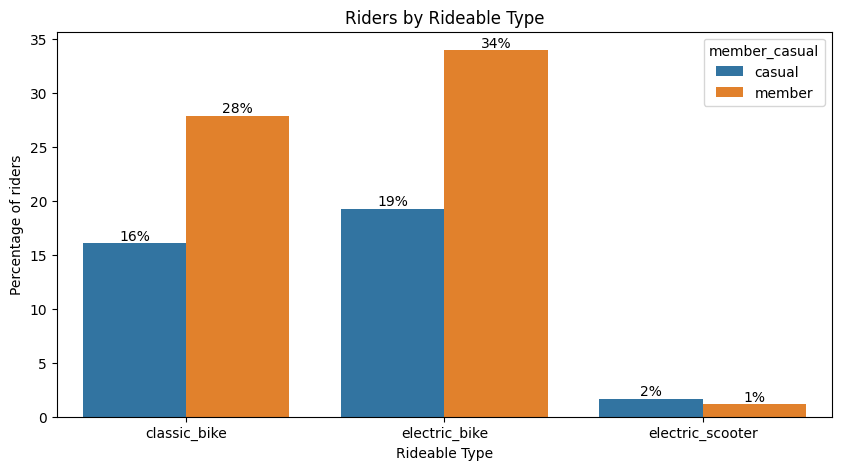

In [48]:
# Plotting the above query
plt.figure(figsize = (10,5))
ax = sns.barplot(x='rideable_type', y='percentage', hue='member_casual', data = riders_grouped)

# Creating percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')

# Creating titles and labels in the graph
plt.title('Riders by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Percentage of riders')
plt.show()

* Casual riders uses less classic bikes around 16% and electric bikes around 19% as compared to annual members around 28% and 34% respectively.
* But Casual riders uses more electric scooter around 2% than annual members which is around 1%.
* From the above graph it is evident that electric bikes and classic bikes are often used by both type of customers. And there is very less use of electric scooter around 3% of the total bikes available.

In [49]:
# Querying for number of customers on different days
customers_on_weekdays = cyclist_df.groupby(['member_casual','day_of_week'])['member_casual'].count().reset_index(name='total_count')


In [50]:
# Querying for total percent of riders on that particular day
customers_on_weekdays['percentage'] = (customers_on_weekdays.groupby('day_of_week')['total_count'].transform(lambda x: x / x.sum() * 100))


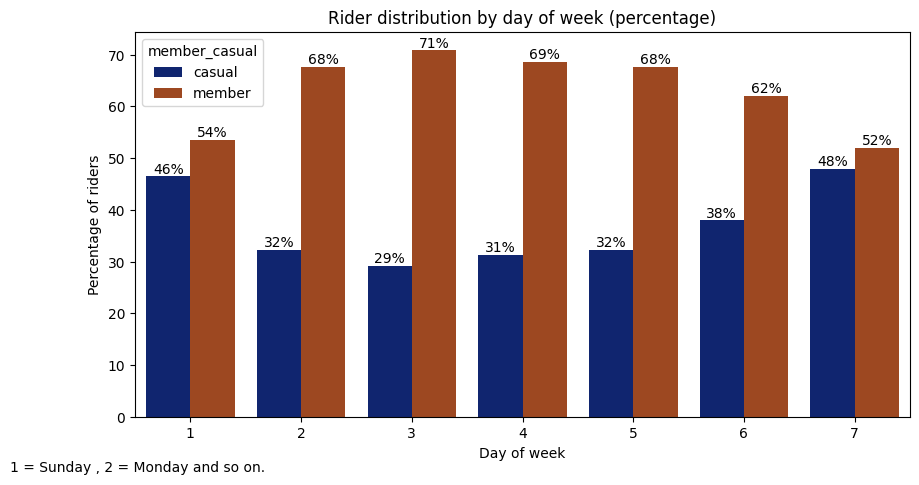

In [51]:
# Plotting the above query

plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'day_of_week',y = 'percentage',hue = 'member_casual',data = customers_on_weekdays,palette='dark')


# Creating percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')

# Creating titles and labels in the graph
plt.title('Rider distribution by day of week (percentage)')
plt.xlabel('Day of week')
plt.ylabel('Percentage of riders')
plt.figtext(0,0,'1 = Sunday , 2 = Monday and so on.',fontsize=10)
plt.show()


* Members are using less rides on Saturday and Sunday that is around 52% and 54% respectively as compared to other days which is above 60%.
* Casual riders are using more bikes on Friday, Saturday and Sunday as compared to other days which is around 38%, 48% and 46% respectively while on other days it is below 32%.
* Friday,Saturday and Sunday would be great for advertising Cyclistic bike to attract casual riders providing some offers to convert them to member.  

In [52]:
# Calculating total percentage of members and casual riders
total_customer = cyclist_df.groupby('member_casual')['member_casual'].count().reset_index(name='total_count')

total_customer['percentage'] = (total_customer['total_count']/total_customer['total_count'].sum()*100).round(2)

total_customer

,member_casual,total_count,percentage
0,casual,1891262,36.98
1,member,3222510,63.02


In [53]:
# Calculating total percentage change converting casual riders to members
number_percent = float(input("Enter the percentage you want to tranfer : "))

customers_transferred = int((total_customer.loc[total_customer['member_casual']=='casual','total_count'] * number_percent/100).iloc[0])


total_customer['net_change_count'] = total_customer['total_count']


total_customer.loc[total_customer['member_casual'] == 'casual','net_change_count'] -= customers_transferred
total_customer.loc[total_customer['member_casual'] == 'member','net_change_count'] += customers_transferred

total_customer['change_percent'] = ((total_customer['net_change_count'] - total_customer['total_count'])/(total_customer['total_count'])*100).round(2)

print('\n')

total_customer

Enter the percentage you want to tranfer : 15




,member_casual,total_count,percentage,net_change_count,change_percent
0,casual,1891262,36.98,1607573,-15.0
1,member,3222510,63.02,3506199,8.8


* If there is 10% conversion of casual riders to members then there is 5.87% increase in members.
* If there is 25% conversion of casual riders to members then there is 14.67% increase in members.
* If there is 100% conversion of casual riders to members then there is 58.69% increase in members.

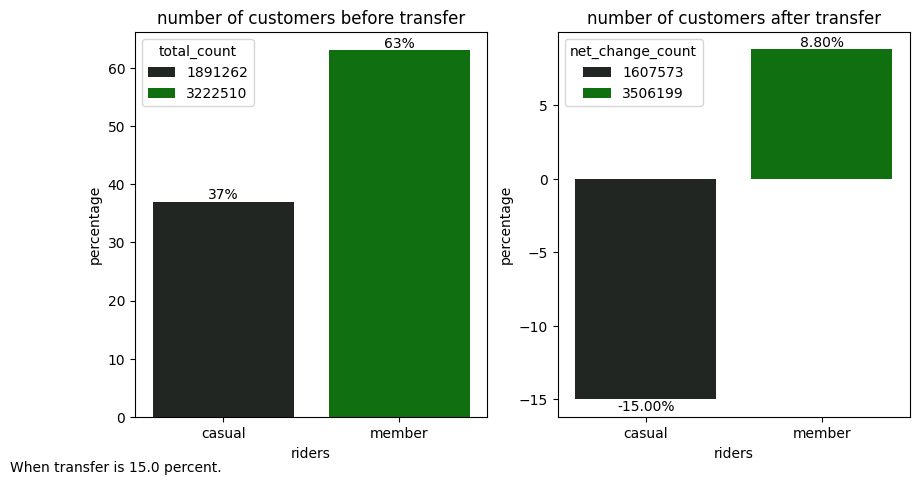

In [54]:
# Plotting the above query

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

ax = sns.barplot(x = 'member_casual',y = 'percentage',hue = 'total_count',data = total_customer,palette='dark:green')

# Creating percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')

# Creating titles and labels in the graph
plt.title('number of customers before transfer')
plt.xlabel('riders')
plt.ylabel('percentage')


# Second Plot

plt.subplot(1,2,2)
ax = sns.barplot(x = 'member_casual',y = 'change_percent',hue = 'net_change_count',data = total_customer,palette='dark:green')

# Creating percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

# Creating titles and labels in the graph
plt.title('number of customers after transfer')
plt.xlabel('riders')
plt.ylabel('percentage')

plt.figtext(0,0,f'When transfer is {number_percent} percent.',fontsize=10)

plt.show()

In [55]:
# Analysing revenue increase if there is increase in member from casual rider
total_member = total_customer.loc[total_customer['member_casual'] == 'member','total_count']

# Assuming members generate 100% revenue
percent_revenue_increase = ((100/total_member) * (total_customer.loc[total_customer['member_casual'] == 'member','net_change_count']))

percent_revenue_increase = float((percent_revenue_increase - 100).round(2).iloc[0])


print('There is',percent_revenue_increase, 'percent increase of revenue  when converting ', number_percent , 'percent of casual rider to member.')


There is 8.8 percent increase of revenue  when converting  15.0 percent of casual rider to member.


* So if there is 25% conversion of casual rider to members, there is an increase of 14.67% of total revenue.

* So casual riders which consists of 37% of total riders riding on Friday, Saturday and Sunday specifically ,must be given importance to convert them to member as they would help in increase revenue of the company by 58.69% if all the casual riders are converted to members.